In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(0)

In [4]:
crime= pd.read_csv("State+UT Wise Crime Data of India (IPC) 2001-2019 .csv")

In [5]:
crime = crime[["Year","Category","State/UT","Crime Rate"]]
# crime = crime.rename({"Crime Rate": "Crime_Rate"}, axis=1)
# crime = crime.rename({"State/UT": "State_UT"}, axis=1)
crime

,Year,Category,State_UT,Crime_Rate
0,2001,Union Territory,A & N Islands,184.831461
1,2001,State,Andhra Pradesh,171.784545
2,2001,State,Arunachal Pradesh,214.665445
3,2001,State,Assam,138.437570
4,2001,State,Bihar,106.700129
...,...,...,...,...
660,2019,State,Tamil Nadu,221.759662
661,2019,State,Tripura,133.400000
662,2019,State,Uttar Pradesh,156.273399
663,2019,State,Uttarakhand,108.059034


In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [7]:

X = crime[['Year', 'Category', 'State_UT']]
y = crime['Crime_Rate']

transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X_encoded = transformer.fit_transform(X)

scaler = StandardScaler(with_mean=False)  
X_scaled = scaler.fit_transform(X_encoded)


X_reshaped = X_scaled.toarray().reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)



model = Sequential()
model.add(GRU(units=64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1)) 

optimizer = Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mae'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[early_stopping])



Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 203.3314 - mae: 203.3314 - val_loss: 188.2247 - val_mae: 188.2247
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 187.5880 - mae: 187.5880 - val_loss: 178.7906 - val_mae: 178.7906
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 182.9876 - mae: 182.9876 - val_loss: 169.7655 - val_mae: 169.7655
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 173.6043 - mae: 173.6043 - val_loss: 158.8935 - val_mae: 158.8935
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 155.8340 - mae: 155.8340 - val_loss: 138.4775 - val_mae: 138.4775
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 122.9974 - mae: 122.9974 - val_loss: 60.7119 - val_mae: 60.7119
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 93.6589 - mae: 93.6589 - val_loss: 65.3115 - val_mae: 65.3115
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 79.5222 - mae: 79.5222 - val_loss: 61.2032 - val_mae: 61.2032
Epoch 9/100
8/8 ━━

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,789 (151.52 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,860 (101.02 KB)

In [9]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
mse, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.4618 - mae: 66.4618 
Mean Absolute Error: 68.02168273925781
Mean Squared Error: 68.02168273925781
R-squared (R^2): 0.1322375894341515


In [10]:
predictions = model.predict(X_test)

print("Predictions:")
print(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predictions:
[[201.72874]
 [200.46312]
 [200.92793]
 [202.75093]
 [202.64395]
 [200.95975]
 [201.22916]
 [201.23555]
 [140.58623]
 [176.56169]
 [200.44676]
 [201.14311]
 [201.56267]
 [139.08142]
 [139.15558]
 [139.838  ]
 [190.62794]
 [139.77127]
 [201.32799]
 [201.50699]
 [200.48479]
 [201.68134]
 [202.2183 ]
 [201.944  ]
 [147.70091]
 [190.97185]
 [140.38133]
 [139.22978]
 [140.24883]
 [200.01906]
 [140.93993]
 [141.52911]
 [140.91388]
 [139.9103 ]
 [139.83653]
 [139.76283]
 [201.09656]
 [140.68224]
 [200.07341]
 [147.73978]
 [202.18044]
 [160.98183]
 [139.6154 ]
 [201.5597 ]
 [140.27907]
 [140.3733 ]
 [201.32518]
 [200.99277]
 [176.52446]
 [203.0829 ]
 [202.37402]
 [201.55217]
 [200.18483]
 [201.15836]
 [200.1874 ]
 [201.48335]
 [200.7808 ]
 [201.71342]
 [201.59242]
 [139.94553]
 [140.94063]
 [201.41316]
 [200.982  ]
 [139.70395]
 [200.40517]
 [141.01906]
 [140.10149]
 [201.16664]
 [139.57472]
 [139.9861 ]
 [139.6888 ]
 [138.85892]
 [200.77843]


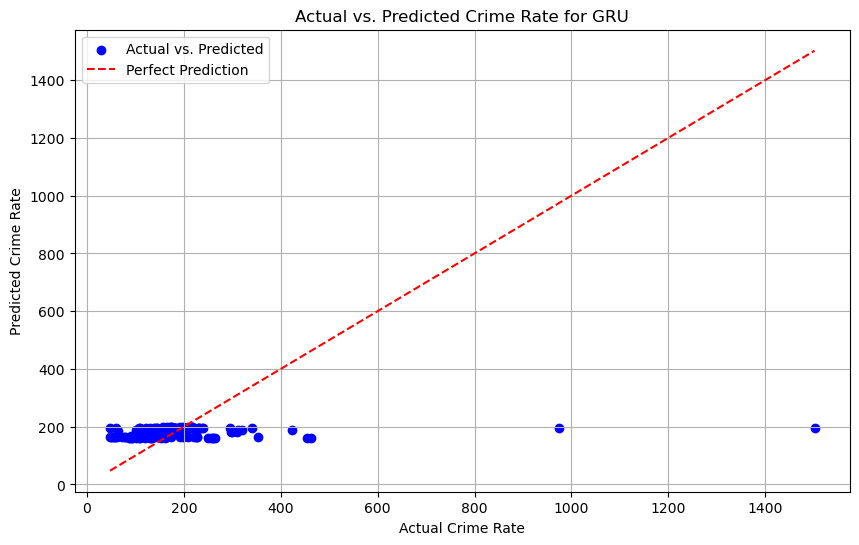

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs. Predicted Crime Rate for GRU')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def predict_crime_rate():
    user_input_year = int(input("Enter the year: "))
    user_input_category = input("Enter the category: ")
    user_input_state = input("Enter the state/UT: ")

    user_input = pd.DataFrame({'Year': [user_input_year], 'Category': [user_input_category], 'State_UT': [user_input_state]})
    user_input_encoded = transformer.transform(user_input)
    user_input_scaled = scaler.transform(user_input_encoded)
    user_input_reshaped = user_input_scaled.toarray().reshape((1, user_input_scaled.shape[1], 1))


    predicted_crime_rate = model.predict(user_input_reshaped)[0][0]

    print("Predicted Crime Rate "+str(user_input_year)+" "+user_input_category+" "+user_input_state+": ", predicted_crime_rate)


predict_crime_rate()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Crime Rate 2021 State Tamil Nadu:  130.85968


In [11]:
# # Save the model using the native Keras format
# model.save('GRU_crime_rate_prediction_model.keras')


In [12]:
from keras.models import load_model


model.save('GRUcrime_rate_prediction_model.h5')

In [13]:

loaded_model = load_model('GRUcrime_rate_prediction_model.h5')

In [14]:
from keras.optimizers import Adam


optimizer = Adam(learning_rate=0.001)

In [15]:
loaded_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
predictionsNEW = loaded_model.predict(X_test)


history = loaded_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 13936.3086 - mae: 76.9270 - val_loss: 6490.3315 - val_mae: 63.9368
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17541.1934 - mae: 81.4567 - val_loss: 6534.0488 - val_mae: 61.9601
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 16936.5449 - mae: 79.8074 - val_loss: 6212.3618 - val_mae: 62.2954
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 17875.7363 - mae: 82.7163 - val_loss: 6121.1938 - val_mae: 61.7555
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14382.4756 - mae: 79.3974 - val_loss: 6017.1411 - val_mae: 59.9268
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12970.7529 - mae: 74.3469 - val_loss: 6052.4912 - val_mae: 61.3832
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 12017.7256 - mae: 75.1968 - val_loss: 6046.2085 - val_mae: 60.6828
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 15285.2900 - mae: 78.3862 - val_loss:

In [16]:
predictionsNEW

array([[197.77148 ],
       [194.39047 ],
       [197.09721 ],
       [199.40718 ],
       [200.6409  ],
       [192.43634 ],
       [197.48334 ],
       [192.705   ],
       [147.6821  ],
       [184.70024 ],
       [191.89026 ],
       [192.61523 ],
       [197.23909 ],
       [126.08102 ],
       [126.141914],
       [132.52242 ],
       [190.95216 ],
       [146.98552 ],
       [197.00142 ],
       [198.42288 ],
       [195.48415 ],
       [197.35817 ],
       [200.21999 ],
       [197.20952 ],
       [166.11453 ],
       [191.52206 ],
       [147.50789 ],
       [126.20281 ],
       [138.07292 ],
       [193.99944 ],
       [131.8491  ],
       [155.13435 ],
       [138.61345 ],
       [129.82707 ],
       [128.81949 ],
       [128.75871 ],
       [196.76439 ],
       [128.78226 ],
       [191.55487 ],
       [166.16533 ],
       [195.83621 ],
       [177.35175 ],
       [128.63713 ],
       [197.5956  ],
       [129.18422 ],
       [142.01366 ],
       [194.36327 ],
       [194.3